# Statistics & Econometrics practical task

#### $by$ $Anastasiia$ $Khaburska$



 ___________________________________________________________________




### Problem 1: Descriptive Statistics and Probability Theory: Simulated Data


The objective : to assess the sensitivity of these measures/tools to outliers or very heterogenous data.

___________________________________________________________
##### 1. Simulate (with a fixed seed) a sample of size n = 100 from the normal distribution with $μ_1 = 10$ and $σ_1^2 = 9$

In [1]:
set.seed(9)
sample_N <- rnorm(100, mean=10, sd=3) 
sample_N

[1]  7.699612  7.550625  9.575394  9.167185 11.308921  6.439382 13.575961
  [8]  9.945429  9.255746  8.911189 13.832712  8.593309 10.213162  9.201885
 [15] 15.535772  7.481651  9.767656  2.146883 12.663652  7.877526 15.270979
 [22] 10.546756  9.199334 12.779265  7.920004 18.045970 10.667573  7.879983
 [29] 11.251640 11.108670  7.258707  9.049256 13.147178 10.504335 10.094321
 [36]  6.969008 11.148255  7.540910 11.085133 10.280114  7.574631  3.941855
 [43]  7.783828 11.148660 15.192591  9.390754  7.010808  6.080391  7.006505
 [50]  8.304914 15.256174  8.356686  7.424423 10.147884  9.399867  6.688137
 [57] 10.721764 11.143341 16.691377 13.597607 10.843667  6.391874 11.395491
 [64] 11.056049  8.230431  7.439200  9.259804 14.618016 11.638233 14.694886
 [71] 10.749011  4.112744  7.572819  8.503945 10.915365  9.132378 14.373143
 [78] 12.621266  7.141132  9.904974 10.342228  6.839020 10.467997 13.901183
 [85]  6.532341 10.648126 12.413435  7.803653  5.145706 12.517208  8.945686
 [92]  7.851147  7.179124 12.190497  8.686389  9.251854  7.983787 12.403042
 [99]  5.533414 11.362035

#### a) Plot the histogram and compare it to the density of $N (10, 9)$

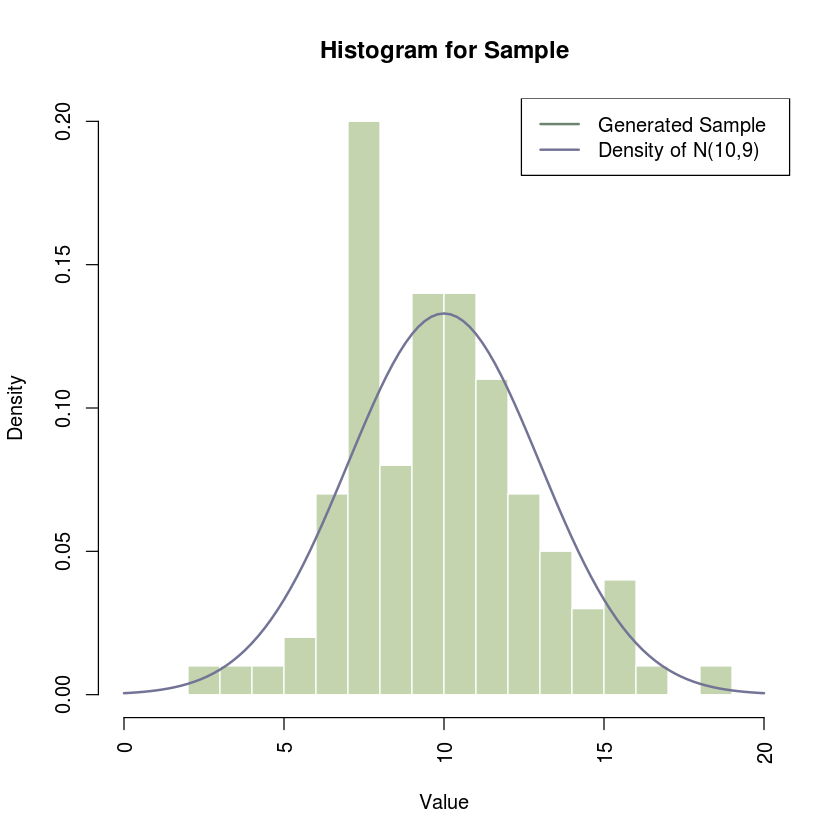

In [2]:
hist(sample_N, 
     main="Histogram for Sample", 
     xlab="Value", 
     border=F, 
     col="#c4d4af", 
     xlim=c(0,20), 
     las=3, 
     breaks=15,
     prob = TRUE)
curve(dnorm(x, 10, 3), add=TRUE, col="#737495", lwd=2)

legend(x = "topright", 
 c("Generated Sample", "Density of N(10,9)"),
 col = c("#6c8672", "#737495"),
 lwd = c(2, 2, 2))

#### b) Now draw a sample $y_i$ of size $n = 100$ from $t_5$ . Transform it as follows: $10 + 3\sqrt{3/5}y_i$ . Plot the histogram and compare the density of $N(10, 9)$.  What can be concluded and why this example might relevant for empirical studies?

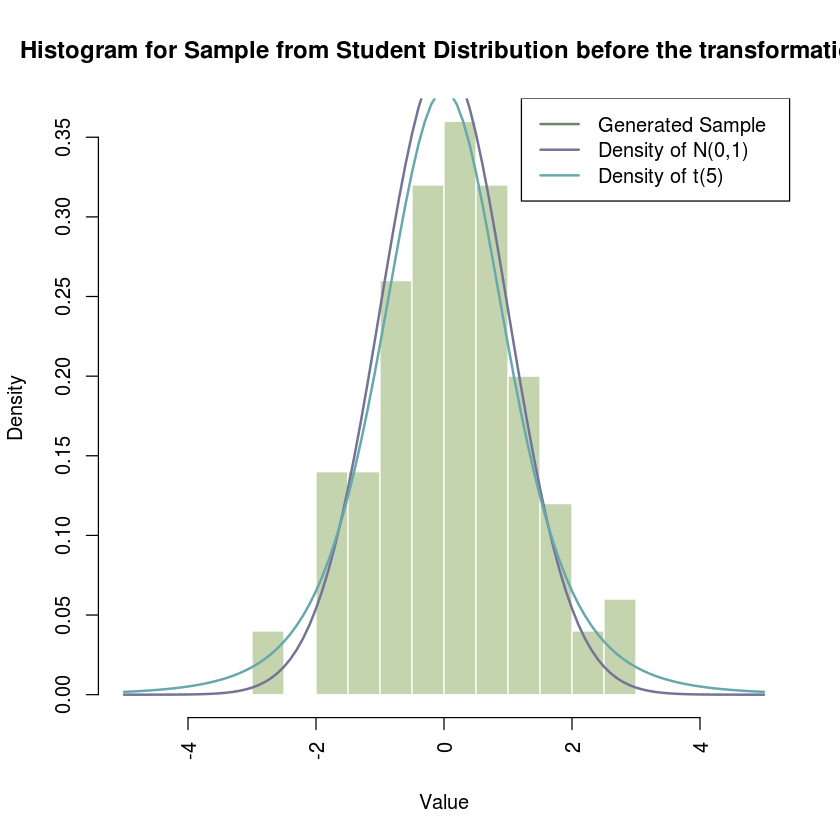

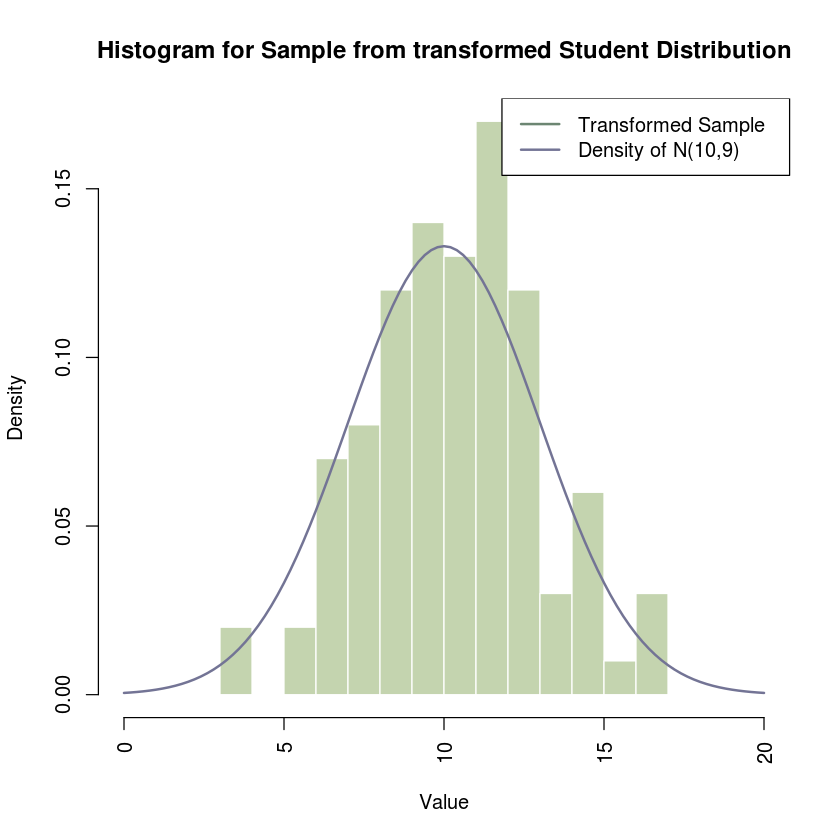

In [3]:
sample_t <- rt(100,5)
hist(sample_t, 
     main="Histogram for Sample from Student Distribution before the transformation", 
     xlab="Value", 
     border=F, 
     col="#c4d4af",
     xlim=c(-5,5),
     las=3, 
     breaks=20,
     prob = TRUE)
curve(dnorm(x, 0, 1), add=TRUE, col="#737495", lwd=2)
curve(dt(x, 5), add=TRUE, col="#68a8ad", lwd=2)

legend(x = "topright", 
 c("Generated Sample", "Density of N(0,1)",  "Density of t(5)"),
 col = c("#6c8672", "#737495", "#68a8ad"),
 lwd = c(2, 2, 2))

sample_t <- 10+ (3*sqrt(3.0/5.0)*sample_t)
#sample_t

hist(sample_t, 
     main="Histogram for Sample from transformed Student Distribution", 
     xlab="Value", 
     border=F, 
     col="#c4d4af", 
     xlim=c(0,20), 
     las=3, 
     breaks=15,
     prob = TRUE)
curve(dnorm(x, 10, 3), add=TRUE, col="#737495", lwd=2)

legend(x = "topright", 
 c("Transformed Sample", "Density of N(10,9)"),
 col = c("#6c8672", "#737495"),
 lwd = c(2, 2, 2))

This implies that t distribution can be approximately transformed into the normal distribution 
$N(m, s^2)$ ~ $m + s*v*t_n = m + s*\sqrt{(n-2)/n}*t_n $ and viсe versa. This can be used in empirical studies, for example, if sample size (from approximately normal distributed cases in population) is small and we don't know the standard deviation of the population. Then the variance of t ddistribution is equal to $v / ( v - 2 )$, where v is the degrees of freedom and $v > 2$.


___________________________________________________________
##### 2. In practice the data is always very heterogenous. To reflect it we contaminate the data by adding an outlier or a subsample with different characteristics.

#### a) To obtain a realistic heterogenous sample add to the original normal data a new sample of size m simulated from $N (20, 2^2 )$,  i.e. $μ_2 = 20$ and $σ_2^2 = 4$. The size $m$ will obviously influence the above measures. Vary $m$ from $10$ to $200$. (The resulting sample is said to stem from a mixture normal distribution).

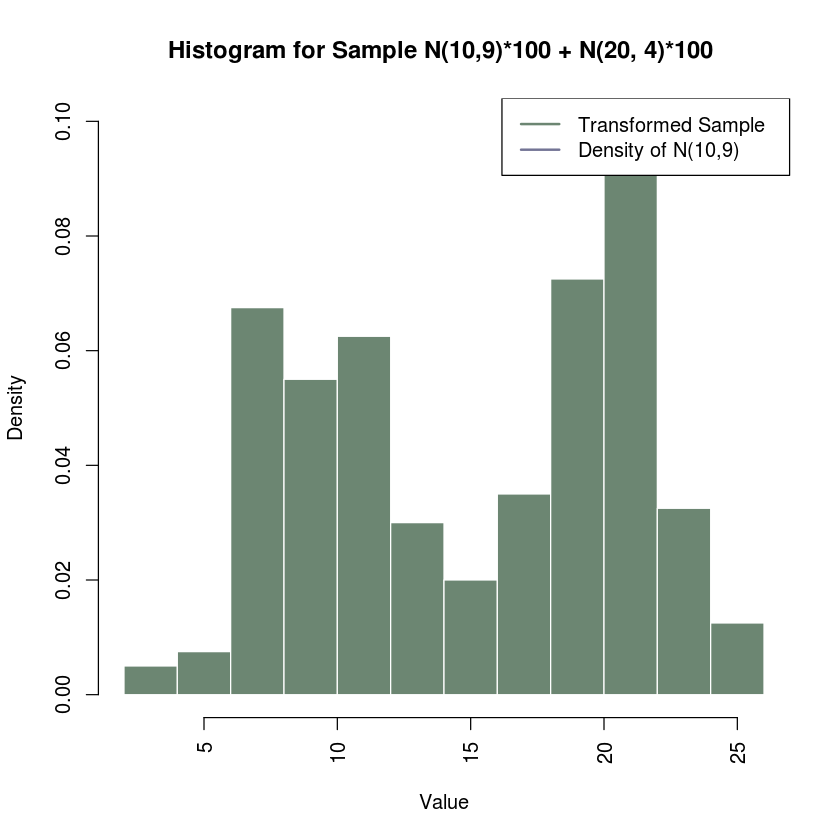

In [4]:
m<-10
sample_N2 <- rnorm(100, mean=20, sd=2) 
sample_heterogenous<- c(sample_N, sample_N2)
hist(sample_heterogenous, 
     main="Histogram for Sample N(10,9)*100 + N(20, 4)*100 ", 
     xlab="Value", 
     border=F, 
     col="#6c8672", 
     #xlim=c(0,20), 
     las=3, 
     breaks=15,
     prob = TRUE)
#curve(dnorm(x, 10, 3), add=TRUE, col="#737495", lwd=2)

legend(x = "topright", 
 c("Transformed Sample", "Density of N(10,9)"),
 col = c("#6c8672", "#737495"),
 lwd = c(2, 2, 2))


#### b) Plot Box-plots (or violin plots) and histograms for each subsample individually and for the sample for a few different values of m.

Loading required package: sm
Package 'sm', version 2.2-5.5: type help(sm) for summary information


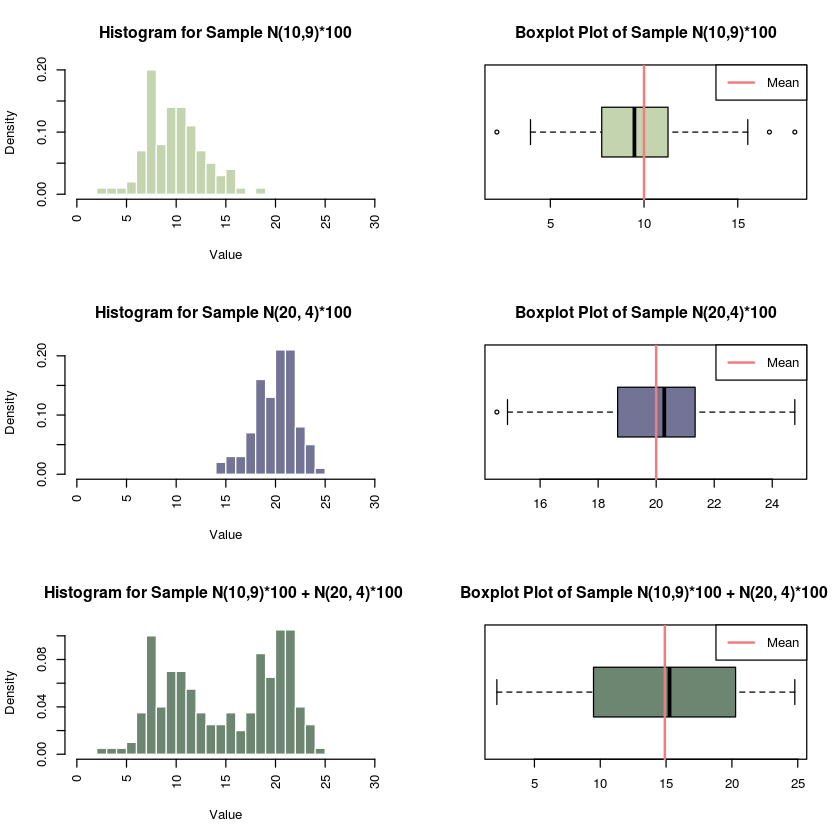

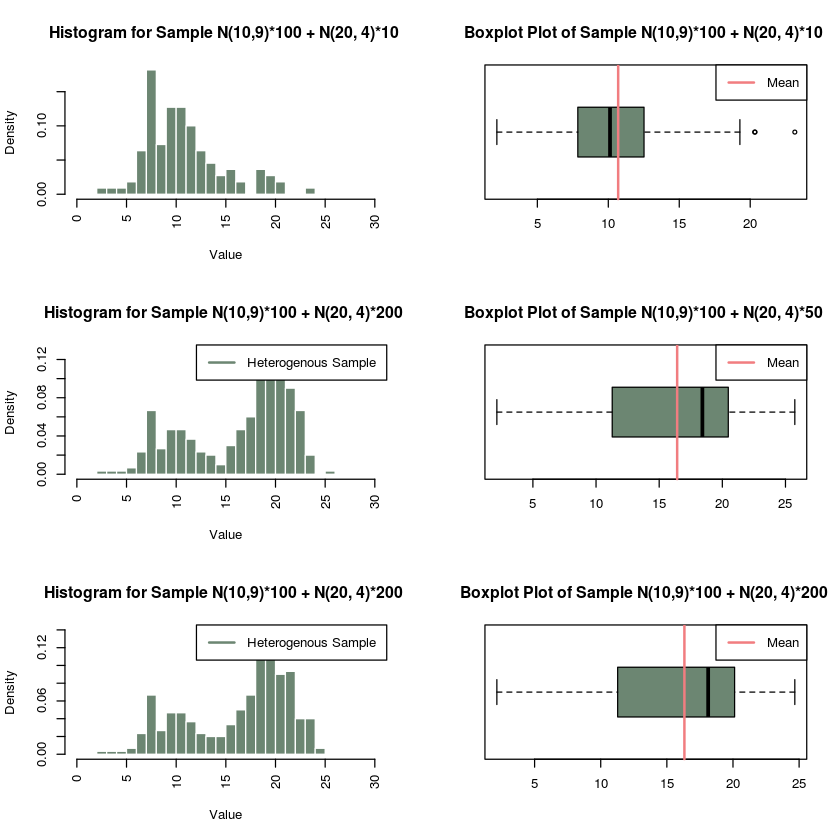

In [5]:
library(vioplot)
par(mfrow=c(3,2))

hist(sample_N, 
     main="Histogram for Sample N(10,9)*100", 
     xlab="Value", 
     border=F, 
     col="#c4d4af", 
     xlim=c(0,30), 
     las=3, 
     breaks=15,
     prob = TRUE)

boxplot(sample_N, col="#c4d4af", horizontal=TRUE)
title("Boxplot Plot of Sample N(10,9)*100")

abline(v = 10,
 col = "#f17d80",
 lwd = 2)

legend(x = "topright", 
 "Mean",
 col =  "#f17d80",
 lwd = c(2, 2, 2))

m<-100
sample_N2 <- rnorm(100, mean=20, sd=2)
hist(sample_N2, 
     main="Histogram for Sample N(20, 4)*100 ", 
     xlab="Value", 
     border=F, 
     col="#737495", 
     xlim=c(0,30), 
     las=3, 
     breaks=10,
     prob = TRUE)
#curve(dnorm(x, 10, 3), add=TRUE, col="#737495", lwd=2)

boxplot(sample_N2, col="#737495", horizontal=TRUE)
title("Boxplot Plot of Sample N(20,4)*100")

abline(v = 20,
 col = "#f17d80",
 lwd = 2)

legend(x = "topright", 
 "Mean",
 col =  "#f17d80",
 lwd = c(2, 2, 2))

sample_heterogenous<- c(sample_N, sample_N2)
hist(sample_heterogenous, 
     main="Histogram for Sample N(10,9)*100 + N(20, 4)*100 ", 
     xlab="Value", 
     border=F, 
     col="#6c8672", 
     xlim=c(0,30), 
     las=3, 
     breaks=20,
     prob = TRUE)
#curve(dnorm(x, 10, 3), add=TRUE, col="#737495", lwd=2)

boxplot(sample_heterogenous, col="#6c8672", horizontal=TRUE)
title("Boxplot Plot of Sample N(10,9)*100 + N(20, 4)*100 ")

abline(v = mean(sample_heterogenous),
 col = "#f17d80",
 lwd = 2)

legend(x = "topright", 
 "Mean",
 col =  "#f17d80",
 lwd = c(2, 2, 2))

sample_N2 <- rnorm(10, mean=20, sd=2)
sample_heterogenous<- c(sample_N, sample_N2)
hist(sample_heterogenous, 
     main="Histogram for Sample N(10,9)*100 + N(20, 4)*10 ", 
     xlab="Value", 
     border=F, 
     col="#6c8672", 
     xlim=c(0,30), 
     las=3, 
     breaks=20,
     prob = TRUE)
#curve(dnorm(x, 10, 3), add=TRUE, col="#737495", lwd=2)

boxplot(sample_heterogenous, col="#6c8672", horizontal=TRUE)
title("Boxplot Plot of Sample N(10,9)*100 + N(20, 4)*10 ")

abline(v = mean(sample_heterogenous),
 col = "#f17d80",
 lwd = 2)

legend(x = "topright", 
 "Mean",
 col =  "#f17d80",
 lwd = c(2, 2, 2))

sample_N2 <- rnorm(200, mean=20, sd=2)
sample_heterogenous<- c(sample_N, sample_N2)
hist(sample_heterogenous, 
     main="Histogram for Sample N(10,9)*100 + N(20, 4)*200 ", 
     xlab="Value", 
     border=F, 
     col="#6c8672", 
     xlim=c(0,30), 
     las=3, 
     breaks=20,
     prob = TRUE)
#curve(dnorm(x, 10, 3), add=TRUE, col="#737495", lwd=2)

legend(x = "topright", 
 c("Heterogenous Sample"),
 col = c("#6c8672"),
 lwd = c(2, 2, 2))

boxplot(sample_heterogenous, col="#6c8672", horizontal=TRUE)
title("Boxplot Plot of Sample N(10,9)*100 + N(20, 4)*50 ")

abline(v = mean(sample_heterogenous),
 col = "#f17d80",
 lwd = 2)

legend(x = "topright", 
 "Mean",
 col =  "#f17d80",
 lwd = c(2, 2, 2))

sample_N2 <- rnorm(200, mean=20, sd=2)
sample_heterogenous<- c(sample_N, sample_N2)
hist(sample_heterogenous, 
     main="Histogram for Sample N(10,9)*100 + N(20, 4)*200 ", 
     xlab="Value", 
     border=F, 
     col="#6c8672", 
     xlim=c(0,30), 
     las=3, 
     breaks=20,
     prob = TRUE)
#curve(dnorm(x, 10, 3), add=TRUE, col="#737495", lwd=2)

legend(x = "topright", 
 c("Heterogenous Sample"),
 col = c("#6c8672"),
 lwd = c(2, 2, 2))

boxplot(sample_heterogenous, col="#6c8672", horizontal=TRUE)
title("Boxplot Plot of Sample N(10,9)*100 + N(20, 4)*200 ")

abline(v = mean(sample_heterogenous),
 col = "#f17d80",
 lwd = 2)

legend(x = "topright", 
 "Mean",
 col =  "#f17d80",
 lwd = c(2, 2, 2))

#### c) Make animated or interactive graphics (with $manipulate, plotly, ggplot$, etc.) to visualize the impact of $m$ on the histogram and location measures (added as vertical lines in the graph) of the data.

library(manipulate)

sample_N2 <- rnorm(200, mean=20, sd=2)

manipulate(
  hist(c(sample_N2[0:m],sample_N), 
          beside = TRUE, main = paste("m =", m, sep=" "),border = False, col = '#c4d4af', xlab='Value'),
  m = slider(10,200))

<img src="giphy.gif">



In this case our heterogenous sample is composed of two similar samples $n1$, $n2$ and as quantity of the second sample $n2=m$ arises, median and mean become closer to this second sample.
In the case, when two samples contribute equally to the resulted sampe $n1=n2=100$, then mean~median.

___________________________________________________________
##### 3. Next step is to simulate two dependent data sets. We simulate two samples with a given value of the correlation coefficient.

#### a) Let $U ∼ N (0, 1)$ and $V ∼ N (0, 1)$. Let $U^∗ = U$ and $V^∗ = ρU + \sqrt{1 − ρ^2}V$ . Prove that $Corr(U^∗ , V^∗ ) = ρ$ and the variances of both variables $U^∗$ and $V^∗$ equal one.

$$Corr(U^*, V^*) = Corr(U, ρU + \sqrt{1 − ρ^2}V) = \frac{(Cov(U, ρU + \sqrt{1 − ρ^2}V))}{\sqrt{Var(U)(ρ^2Var(U) + (1 − ρ^2)Var(V) + 2*ρ\sqrt{1 − ρ^2}Cov(U, V))}} $$

Because U and V are independent:
$$Cov(U,V) = 0 $$
As $U ∼ N (0, 1)$ and $V ∼ N (0, 1)$:
$$Var(U) = Var(V) = 1 $$

$$Corr(U^*, V^*) = \frac{(Cov(U, ρU + \sqrt{1 − ρ^2}V))}{\sqrt{ρ^2 + (1 − ρ^2)}} = \frac{ρCov(U, U) + \sqrt{1 − ρ^2}Cov(U, V)}{1} = \frac{ρVar(U)}{1} = ρ$$

#### b) Use the above idea to simulate two samples of size $n = 100$ from a normal distribution with different values of $ρ$. Compute the correlation coefficients of $Pearson$ and of $Spearman$. Compare the correlation to the original parameter  $ρ$ (for example, plot $Pearson$ vs.  $ρ$ and $Spearman$ vs.  $ρ$).

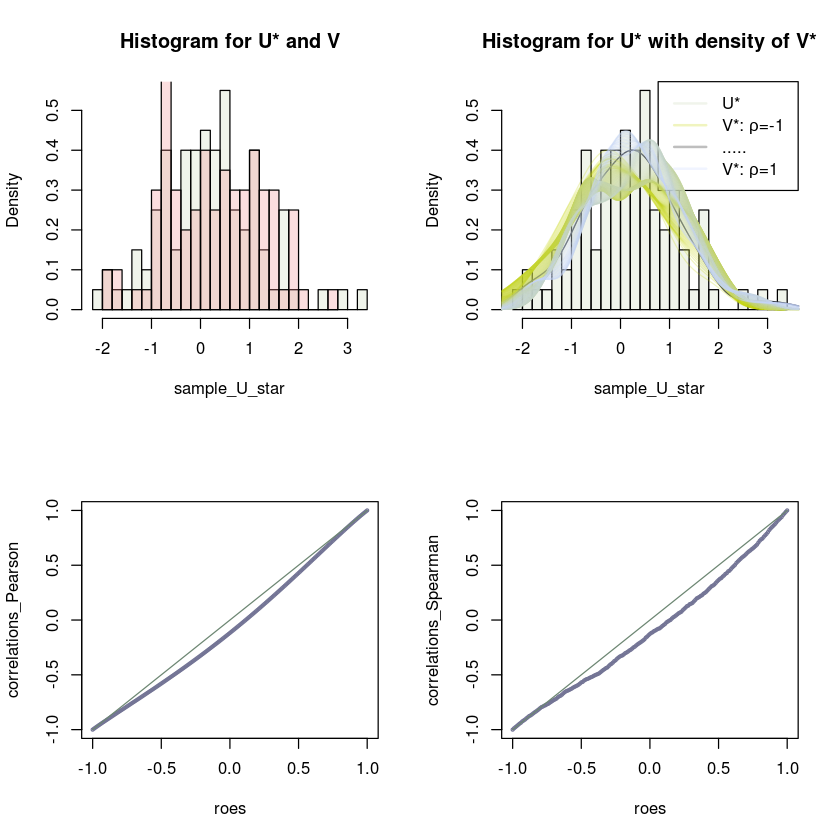

In [6]:
set.seed(35)
par(mfrow=c(2,2))
sample_U <- rnorm(100, mean=0, sd=1) 
sample_V <- rnorm(100, mean=0, sd=1) 
sample_U_star <- sample_U

hist(sample_U_star, 
     main="Histogram for U* and V",  
     border=T,
     col=rgb(0.769,0.831,0.686,1/4),
     breaks=20,
     #xlim=c(0,15500), 
     prob = TRUE)  
hist(sample_V, 
     border=T, 
     col=rgb(0.945,0.49,0.502,1/4),  
     prob = TRUE,
     breaks=20,
     add=T) 

hist(sample_U_star, 
     main="Histogram for U* with density of V*", 
     border=T,
     col=rgb(0.769,0.831,0.686,1/4),
     breaks=20,
     #xlim=c(0,15500), 
     prob = TRUE)                    # centered at 4 

lines(density(sample_U_star))

legend(x = "topright", 
 c( "U*",  "V*: ρ=-1","....." , "V*: ρ=1"),
 col = c( rgb(0.769,0.831,0.686,1/4), rgb(0.769,0.831,0,1/4), "grey", rgb(0.769,0.831,1,1/4)),
 lwd = c(2, 2, 2))

roes <- seq(-1, 1, by=0.01)
correlations_Pearson <- c()
correlations_Spearman <- c()
for (ro in roes) {
    sample_V_star <- (ro*sample_U) + (sqrt(1-(ro*ro))*sample_V)
    correlations_Pearson <- c(correlations_Pearson, cor(sample_U_star, sample_V_star, method = "pearson"))
    correlations_Spearman <- c(correlations_Spearman, cor(sample_U_star, sample_V_star, method = "spearman"))
    lines(density(sample_V_star), col= rgb(0.769,0.83,(ro+1)/2,1/4))
}



plot(x=roes, y = correlations_Pearson , col = "#737495" , type='o',  cex=.4 )
lines(x=roes, y = roes , col = "#6c8672" )

plot(x=roes, y = correlations_Spearman , col = "#737495" , type='o',  cex=.4 )
lines(x=roes, y = roes , col = "#6c8672" )

As $ρ$ becomes higher, resulted sample $V*$ becomes closer to sample U.

Pearson correlation is almost the same as $ρ$, but not exactly, because actually $cov(U,V)$ ~ $0$ , $var(U)$ ~ $ var(V)$ ~ $1$, as we work with random samples. 

#### c) Make a nonlinear but monotone transformation of $V^∗$ , say $V^2$ , $ln$ or $exp$. Check the impact of this transformation on the correlation coefficients of $Spearman$ and $Pearson$. Think about an appropriate visualization of the findings.

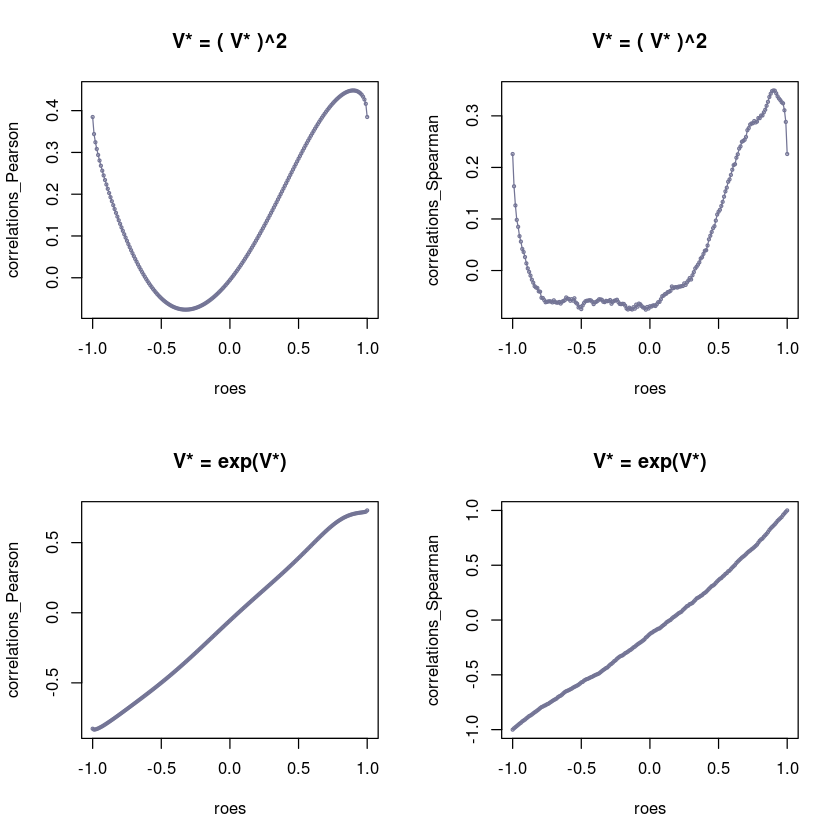

In [7]:

roes <- seq(-1, 1, by=0.01)
correlations_Pearson <- c()
correlations_Spearman <- c()
for (ro in roes) {
    sample_V_star <- ((ro*sample_U) + (sqrt(1-(ro*ro))*sample_V))^2
    correlations_Pearson <- c(correlations_Pearson, cor(sample_U_star, sample_V_star, method = "pearson"))
    correlations_Spearman <- c(correlations_Spearman, cor(sample_U_star, sample_V_star, method = "spearman"))
}

par(mfrow=c(2,2))


plot(x=roes, y = correlations_Pearson , col = "#737495" , type='o',  cex=.4 , main ="V* = ( V* )^2")

plot(x=roes, y = correlations_Spearman , col = "#737495" , type='o',  cex=.4, main ="V* = ( V* )^2" )

roes <- seq(-1, 1, by=0.01)
correlations_Pearson <- c()
correlations_Spearman <- c()
for (ro in roes) {
    sample_V_star <- exp((ro*sample_U) + (sqrt(1-(ro*ro))*sample_V))
    correlations_Pearson <- c(correlations_Pearson, cor(sample_U_star, sample_V_star, method = "pearson"))
    correlations_Spearman <- c(correlations_Spearman, cor(sample_U_star, sample_V_star, method = "spearman"))
}

plot(x=roes, y = correlations_Pearson , col = "#737495" , type='o',  cex=.4, main ="V* = exp(V*)")

plot(x=roes, y = correlations_Spearman , col = "#737495" , type='o',  cex=.4, main ="V* = exp(V*)")



In the first case between changes in Pearson correlaion and $ρ$ steps exists only nonlinear dependence  , but it depends on the sample and is not as clear as in previous case.
In the second case there is strong almost linear, strongly monotonic dependence between correlations and $ρ$ steps.